In [73]:
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import seaborn as sb
import numpy as np
import pandas as pd
import sklearn as sk

In [74]:
data = pd.read_csv('Netflix_data.csv')
#print(tabulate(df, headers = 'firstrow', tablefmt = 'psql'))
print(data.head(5))
data.columns

    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United Sta

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [75]:
data.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [76]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['day_added'] = data['date_added'].dt.day
data['year_added'] = data['date_added'].dt.year
data['month_added']= data['date_added'].dt.month
data['year_added'].astype(float)
data['day_added'].astype(float)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9.0,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9.0,2016.0,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",8.0,2018.0,9.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,8.0,2018.0,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8.0,2017.0,9.0


In [77]:
figure(figsize = (30, 15))

<Figure size 2160x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

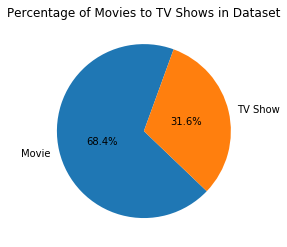

In [78]:
plot.title('Percentage of Movies to TV Shows in Dataset')
plot.pie(data.type.value_counts(), labels = data.type.unique(), autopct='%1.1f%%', pctdistance = .5, startangle = 70)
plot.show()

In [79]:
data.dropna(subset = ['date_added', 'rating'], how = 'any').shape
data = data.dropna(subset = ['date_added', 'rating'], how = 'any')

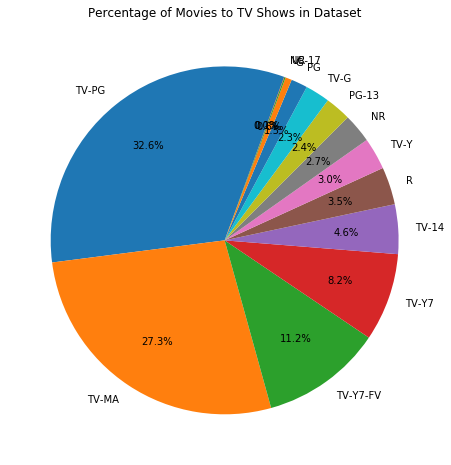

In [81]:
fig = plot.subplots(figsize = (16,8))
plot.title('Percentage of Movies to TV Shows in Dataset')
plot.pie(data.rating.value_counts(), labels = data.rating.unique(), autopct='%1.1f%%', pctdistance = .7, startangle = 70)
plot.show()

In [23]:
d = data.groupby(['type', 'rating'])[['type']].count()
d

type
type    rating        
Movie   G           36
        NC-17        2
        NR         202
        PG         183
        PG-13      286
        R          506
        TV-14     1038
        TV-G        80
        TV-MA     1348
        TV-PG      432
        TV-Y        41
        TV-Y7       69
        TV-Y7-FV    27
        UR           7
TV Show G            1
        NR          15
        PG           1
        R            2
        TV-14      657
        TV-G        69
        TV-MA      677
        TV-PG      267
        TV-Y       101
        TV-Y7       99
        TV-Y7-FV    68

In [30]:
movie_ratings = d.drop(index = 'TV Show')
tv_ratings = d.drop(index = 'Movie')

In [31]:
print(movie_ratings)
print(tv_ratings)

                type
type  rating        
Movie G           36
      NC-17        2
      NR         202
      PG         183
      PG-13      286
      R          506
      TV-14     1038
      TV-G        80
      TV-MA     1348
      TV-PG      432
      TV-Y        41
      TV-Y7       69
      TV-Y7-FV    27
      UR           7
                  type
type    rating        
TV Show G            1
        NR          15
        PG           1
        R            2
        TV-14      657
        TV-G        69
        TV-MA      677
        TV-PG      267
        TV-Y       101
        TV-Y7       99
        TV-Y7-FV    68


In [40]:
movie_ratings = movie_ratings.droplevel(level = 0)
tv_ratings = tv_ratings.droplevel(level = 0)

In [45]:
movie_ratings = movie_ratings.reset_index()
tv_ratings = tv_ratings.reset_index()

In [46]:
print(movie_ratings)
print(tv_ratings)

    index    rating  type
0       0         G    36
1       1     NC-17     2
2       2        NR   202
3       3        PG   183
4       4     PG-13   286
5       5         R   506
6       6     TV-14  1038
7       7      TV-G    80
8       8     TV-MA  1348
9       9     TV-PG   432
10     10      TV-Y    41
11     11     TV-Y7    69
12     12  TV-Y7-FV    27
13     13        UR     7
    index    rating  type
0       0         G     1
1       1        NR    15
2       2        PG     1
3       3         R     2
4       4     TV-14   657
5       5      TV-G    69
6       6     TV-MA   677
7       7     TV-PG   267
8       8      TV-Y   101
9       9     TV-Y7    99
10     10  TV-Y7-FV    68


In [66]:
col = 'rating'

vc1 = movie_ratings[col].value_counts().reset_index()
vc1['rating'] = movie_ratings['type']
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = tv_ratings[col].value_counts().reset_index()
vc2['rating'] = tv_ratings['type']
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="Movies", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="TV Show", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content by rating", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [158]:
p = data[['type', 'title', 'duration']]
p['title_length'] = p['title'].str.len()
p = p.drop('title', 1)
p

,type,duration,title_length
0,Movie,90 min,39
1,Movie,94 min,26
2,TV Show,1 Season,18
3,TV Show,1 Season,32
4,Movie,99 min,12
5,TV Show,1 Season,7
6,Movie,110 min,8
7,Movie,60 min,34
8,TV Show,1 Season,12
9,Movie,90 min,11


In [159]:
name_split = p['duration'].str.split()
p['int_duration'] = name_split.str[0]
p['int_duration'] = pd.to_numeric(p['int_duration'])
p.dtypes
p = p.drop('duration', 1)
p

,type,title_length,int_duration
0,Movie,39,90
1,Movie,26,94
2,TV Show,18,1
3,TV Show,32,1
4,Movie,12,99
5,TV Show,7,1
6,Movie,8,110
7,Movie,34,60
8,TV Show,12,1
9,Movie,11,90


In [160]:
movie_t_id = p[p['type'] == 'Movie']
TV_t_id = p[p['type'] == 'TV Show']

In [161]:
movie_t_id = movie_t_id.rename(columns = {'int_duration': 'movie length'})
TV_t_id = TV_t_id.rename(columns = {'int_duration': 'number of seasons'})

In [162]:
TV_t_id

,type,title_length,number of seasons
2,TV Show,18,1
3,TV Show,32,1
5,TV Show,7,1
8,TV Show,12,1
26,TV Show,15,1
28,TV Show,14,1
34,TV Show,26,1
39,TV Show,7,1
54,TV Show,11,1
61,TV Show,9,1


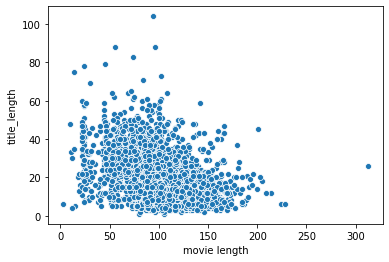

In [163]:
sb.scatterplot(x = 'movie length', y = 'title_length', data = movie_t_id)

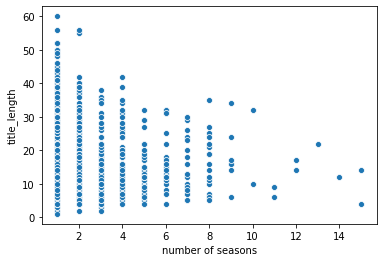

In [164]:
sb.scatterplot(x = 'number of seasons', y = 'title_length', data = TV_t_id)

In [167]:
q = data[['type', 'country', 'duration']]
name_split = q['duration'].str.split()
q['int_duration'] = name_split.str[0]
q['int_duration'] = pd.to_numeric(q['int_duration'])
q.dtypes
q = q.drop('duration', 1)
q

,type,country,int_duration
0,Movie,"United States, India, South Korea, China",90
1,Movie,United Kingdom,94
2,TV Show,United States,1
3,TV Show,United States,1
4,Movie,United States,99
5,TV Show,Spain,1
6,Movie,"Bulgaria, United States, Spain, Canada",110
7,Movie,Chile,60
8,TV Show,United States,1
9,Movie,"United States, United Kingdom, Denmark, Sweden",90


In [170]:
movie_country = q[q['type'] == 'Movie']
TV_country = q[q['type'] == 'TV Show']
movie_country = movie_country.rename(columns = {'int_duration': 'movie length'})
TV_country = TV_country.rename(columns = {'int_duration': 'number of seasons'})

In [180]:
TV_country['number of seasons'].value_counts()

1     1319
2      300
3      157
4       60
5       45
6       22
7       21
8       16
9        7
15       2
12       2
11       2
10       2
14       1
13       1
Name: number of seasons, dtype: int64